# Example 3.3

<p style="width:10%; float:right; padding-left: 50px;">
    <img src="../images/book_cover.jpg">
</p>

From Parameter Estimation and Inverse Problems, 3rd edition, 2018 by R. Aster, B. Borchers, C. Thurber

### Implemented in Python by:
* Nima Nooshiri [@nimanzik](https://github.com/nimanzik)

In [1]:
%reset -f

## Imports

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as nla

from peiplib.linalg import svdsolve
from peiplib.util import shaw_problem

In [2]:
plt.style.use('ggplot')
plt.style.use('./data/peiplib.mplstyle')

## Shaw test problem

In [3]:
# Discretizing values for data and model points
n_data, n_model = 20, 20

# Get the data for `n_data=n_model=20`
gamma, theta, G = shaw_problem(n_data, n_model)

## Singular-Value Decomposition (SVD) of system matrix, $\textbf{G}$

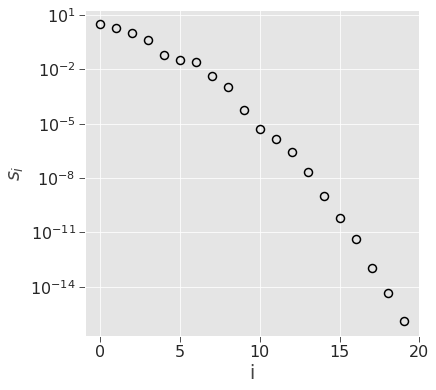

In [4]:
# Compute the SVD
U, S, VT = nla.svd(G, full_matrices=True, compute_uv=True)
V = np.transpose(VT)

# Display semilog plot of singular values
fig, ax = plt.subplots()
ax.semilogy(S, 'ko', mfc='None')
ax.set(xlabel=r'i', ylabel=r'$s_{i}$', xticks=range(0, S.size+1, 5));

## Columns of $\textbf{V}$ corresponding to the smallest and largest nonzero singular values

No. of observations: 20 and no. of model parameters: 20
System rank p=18



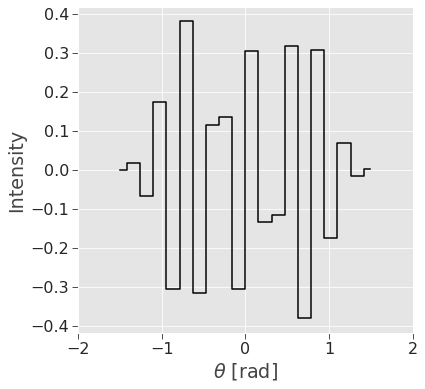

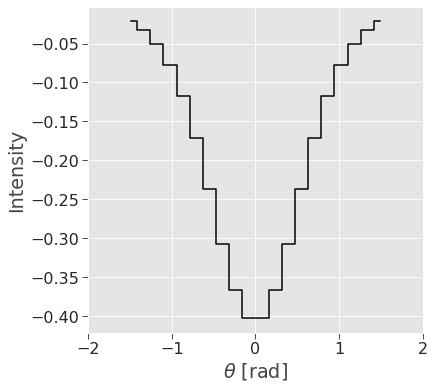

In [5]:
# Rank of system matrix `G`
p = nla.matrix_rank(G)
print(f'No. of observations: {n_data} and no. of model parameters: {n_model}')
print(f'System rank p={p}\n')

# Plot column of `V` corresponds to the smallest nonzero singular value
fig, ax = plt.subplots()
ax.step(theta, V[:, p-1], 'k', where='mid')
ax.set(xlabel=r'$\theta$ [rad]', ylabel='Intensity', xlim=[-2, 2])

# Plot column of `V` corresponds to the largest nonzero singular value
fig, ax = plt.subplots()
ax.step(theta, V[:, 0], 'k', where='mid')
ax.set(xlabel=r'$\theta$ [rad]', ylabel='Intensity', xlim=[-2, 2]);

## Test setup

In [6]:
# Create a spike model
spike = np.zeros(n_model, dtype=np.float64)
spike[9] = 1.0

# Get the ideal Shaw spike data
dspike = G @ spike

# Create slightly noisy data (dspiken)
noise = 1.0e-6   # noise standard deviation
dspiken = dspike + noise * np.random.default_rng().standard_normal(n_data)

### Displaying the spike model and noise-free Shaw spike data

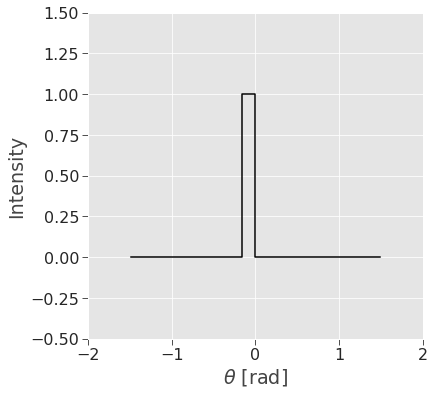

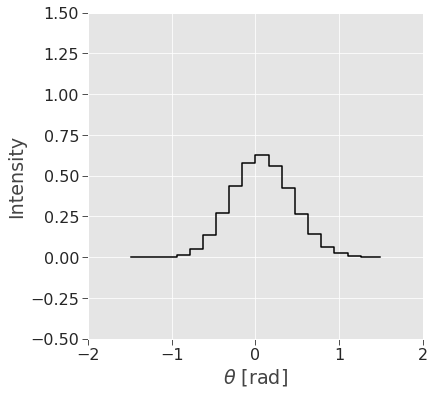

In [7]:
# Displaying the spike model
fig, ax = plt.subplots()
ax.step(theta, spike, 'k', where='mid')
ax.set(
    xlabel=r'$\theta$ [rad]', ylabel='Intensity',
    xlim=(-2, 2), ylim=(-0.5, 1.5))

# Displaying noise-free Shaw spike data
fig, ax = plt.subplots()
ax.step(theta, dspike, 'k', where='mid')
ax.set(
    xlabel=r'$\theta$ [rad]', ylabel='Intensity',
    xlim=(-2, 2), ylim=(-0.5, 1.5));

## Generalized solution for **noise-free** data

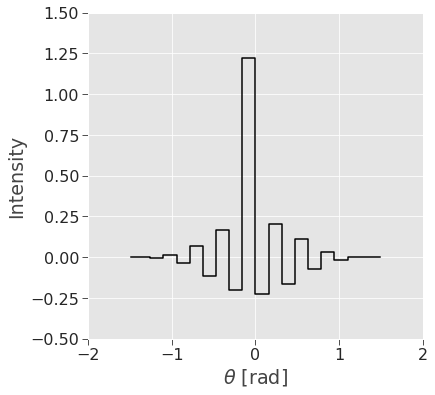

In [8]:
spikemod = nla.solve(G, dspike)

# Plot generalized inverse solution for noise-free spike model data
fig, ax = plt.subplots()
ax.step(theta, spikemod, 'k', where='mid')
ax.set(
    xlabel=r'$\theta$ [rad]', ylabel='Intensity',
    xlim=(-2, 2), ylim=(-0.5, 1.5));

## Pseudo-inverse solution with **noisy** data

### 1. for $p=18$, i.e. using all non-zero singular values

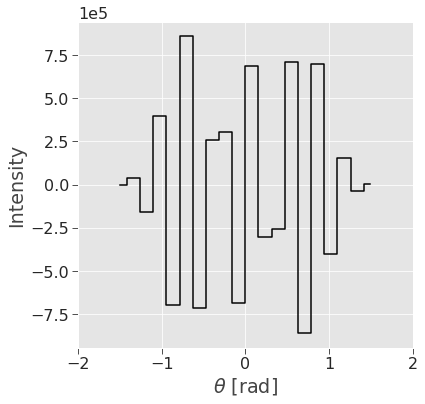

In [9]:
# Recover noisy model when p=18
spikemod18n = svdsolve(G, dspiken, n_keep=p)

# Plot recovered model for noisy data
fig, ax = plt.subplots()
ax.step(theta, spikemod18n, 'k', where='mid')
ax.set(
    xlabel=r'$\theta$ [rad]', ylabel='Intensity', xlim=(-2, 2))

ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0));

### 2. for $p=10$, only the 10 largest singular values

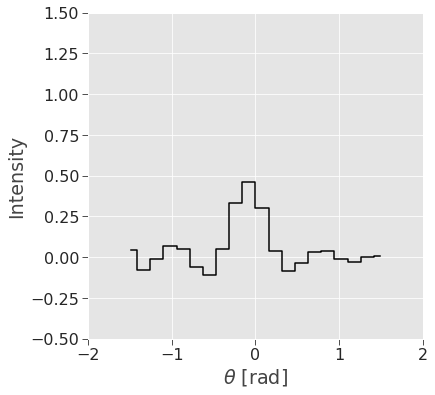

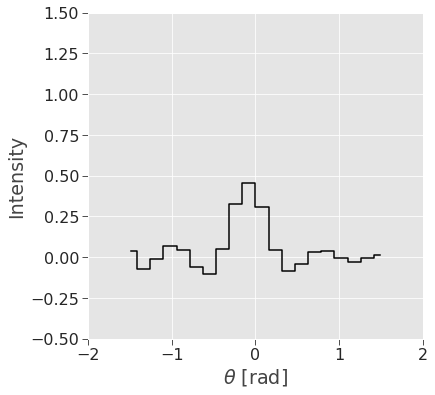

In [10]:
# Recover the noise-free model when p=10
spikemod10 = svdsolve(G, dspike, n_keep=10)

# Recover the noisy model when p=10
spikemod10n = svdsolve(G, dspiken, n_keep=10)

# Plot recovered model for noise-free data when p=10
fig, ax = plt.subplots()
ax.step(theta, spikemod10, 'k', where='mid')
ax.set(
    xlabel=r'$\theta$ [rad]', ylabel='Intensity',
    xlim=(-2, 2), ylim=(-0.5, 1.5))

# Plot recovered model for noisy data when p=10
fig, ax = plt.subplots()
ax.step(theta, spikemod10n, 'k', where='mid')
ax.set(
    xlabel=r'$\theta$ [rad]', ylabel='Intensity',
    xlim=(-2, 2), ylim=(-0.5, 1.5));

---

## Discretize the problem with a larger number of intervals

What happens if we discretize the problem with $n=m=100$ intervals?

No. of observations: 100 and no. of model parameters: 100
System rank p=20



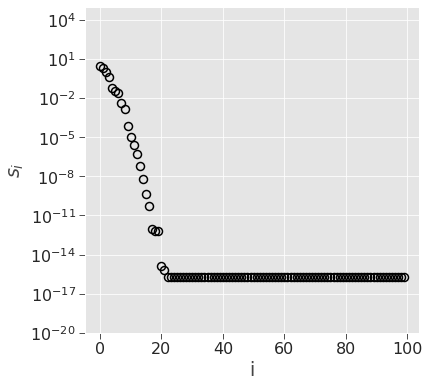

In [11]:
# Get the data for 100 data and model intervals
n_data2, n_model2 = 100, 100
gamma2, theta2, G2 = shaw_problem(n_data2, n_model2)

# Rank of system matrix `G2`
p2 = nla.matrix_rank(G2)
print(
    f'No. of observations: {n_data2} and no. of model parameters: {n_model2}')
print(f'System rank p={p2}\n')

# Compute the SVD
U2, S2, VT2 = nla.svd(G2, full_matrices=True, compute_uv=True)
V2 = np.transpose(VT2)

# Plot spectrum of singular values for n_model=n_data=100 problem
fig, ax = plt.subplots()
ax.semilogy(S2, 'ko', mfc='None')
ax.set(
    xlabel=r'i', ylabel=r'$s_{i}$',
    xticks=range(0, S2.size+1, 20), ylim=(1.0e-20, 1.0e5));

## Test setsup for $n=m=100$ problem

In [12]:
# Get spike model for n_model=100
spike2 = np.zeros(n_model2, dtype=np.float64)
spike2[45:50] = 1.0

# Get spike data for n=100 case without noise
dspike2 = G2 @ spike2

# Add noise to get noisy data
dspiken2 = dspike2 + noise * np.random.default_rng().standard_normal(n_data2)

## Pseudo-inverse solution with **noisy** data

### 1. $p=10$ (for $n=m=100$ problem)

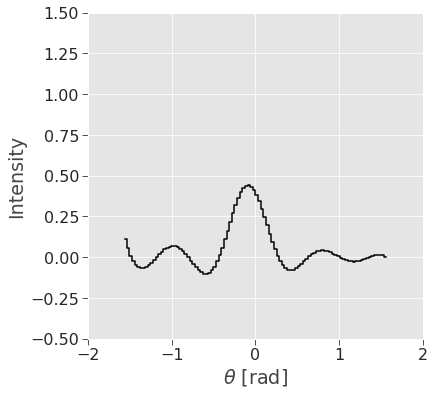

In [13]:
# Recover the model from noisy data with n=100, p=10
spikemod10n_2 = svdsolve(G2, dspiken2, n_keep=10)

# Plot recovered model for noisy data with n=100, p=10
fig, ax = plt.subplots()
ax.step(theta2, spikemod10n_2, 'k', where='mid')
ax.set(
    xlabel=r'$\theta$ [rad]', ylabel='Intensity',
    xlim=(-2, 2), ylim=(-0.5, 1.5));

### 2. $p=18$ (for $n=m=100$ problem)

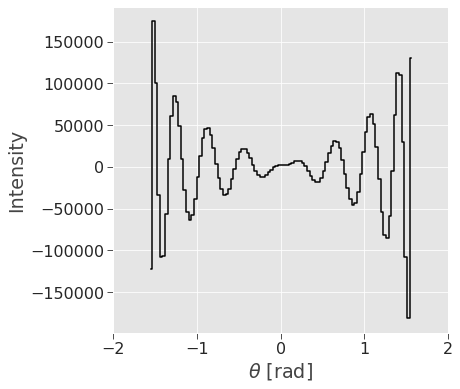

In [14]:
# Recover the model from noisy data with n=100, p=18
spikemod18n_2 = svdsolve(G2, dspiken2, n_keep=18)

# Plot recovered model for noisy data with n=100, p=10
fig, ax = plt.subplots()
ax.step(theta2, spikemod18n_2, 'k', where='mid')
ax.set(
    xlabel=r'$\theta$ [rad]', ylabel='Intensity', xlim=(-2, 2));

---
## Discretize the problem with a smalle number of intervals

What happens if we discretize the problem with $n=m=6$ intervals?

No. of observations: 6 and no. of model parameters: 6
System rank p=6



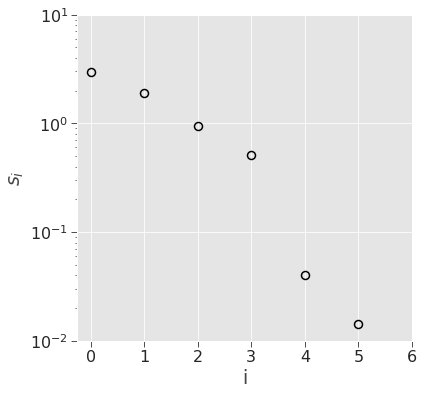

In [15]:
n_data3, n_model3 = 6, 6
_, _, G3 = shaw_problem(n_data3, n_model3)

# Rank of system matrix `G3`
p3 = nla.matrix_rank(G3)
print(
    f'No. of observations: {n_data3} and no. of model parameters: {n_model3}')
print(f'System rank p={p3}\n')

# Compute the SVD of G3
S3 = nla.svd(G3, compute_uv=False)

# Plot singular values of system matrix for n=6
fig12, ax = plt.subplots()
ax.semilogy(S3, 'ko', mfc='None')
ax.set(
    xlabel=r'i', ylabel=r'$s_{i}$',
    xticks=range(0, S3.size+1), ylim=(1.0e-2, 1.0e+1));

## Save model and data arrays

Save arrays that are used later in next chapter.

In [16]:
# Shaw test problem with n=m=20 intervals
np.savez_compressed(
    './data/shaw20.npz',
    G=G,
    dspike=dspike,
    dspiken=dspiken,
    theta=theta,
    gamma=gamma)